# Análise Exploratória e Tratamento dos Dados Investidores Tesouro Direto

In [1]:
# Importação dos pacotes
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import matplotlib.pyplot as plt # visualização gráfica

In [2]:
# Abrindo o arquivo com os dados brutos
df = pd.read_csv("base_atualizada.csv", encoding='ISO-8859-1', sep=';')

In [3]:
# Informações Gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61456270 entries, 0 to 61456269
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Codigo do Investidor  int64 
 1   Data de Adesao        object
 2   Estado Civil          object
 3   Genero                object
 4   Profissao             object
 5   Idade                 int64 
 6   UF do Investidor      object
 7   Cidade do Investidor  object
 8   Pais do Investidor    object
 9   Situacao da Conta     object
 10  Operou 12 Meses       object
dtypes: int64(2), object(9)
memory usage: 5.0+ GB


In [4]:
# Verificando o tamanho do dataset
df.shape

(61456270, 11)

In [5]:
# Verificando os nomes das colunas
print(df.columns)

Index(['Codigo do Investidor', 'Data de Adesao', 'Estado Civil', 'Genero',
       'Profissao', 'Idade', 'UF do Investidor', 'Cidade do Investidor',
       'Pais do Investidor', 'Situacao da Conta', 'Operou 12 Meses'],
      dtype='object')


In [6]:
# Renomeando as colunas
df.rename(columns={
    'Codigo do Investidor': 'codigo',
    'Data de Adesao': 'data.adesao',
    'Estado Civil': 'estado.civil',
    'Genero': 'genero',
    'Profissao': 'profissao',
    'Idade': 'idade',
    'UF do Investidor': 'uf',
    'Cidade do Investidor': 'cidade',
    'Pais do Investidor': 'pais',
    'Situacao da Conta': 'situacao',
    'Operou 12 Meses': 'operou.12.meses'
}, inplace=True)

print(df.columns.to_list())

['codigo', 'data.adesao', 'estado.civil', 'genero', 'profissao', 'idade', 'uf', 'cidade', 'pais', 'situacao', 'operou.12.meses']


In [7]:
# Verificar quantos códigos únicos existem
num_codigos_unicos = df["codigo"].nunique()
print(f"Quantidade de códigos únicos: {num_codigos_unicos}")

Quantidade de códigos únicos: 32734873


In [8]:
# Conta quantos valores únicos existem para cada coluna dentro de cada código
divergencias = df.groupby("codigo").nunique()

# Verifica, para cada coluna, se há algum código com mais de 1 valor distinto
colunas_com_divergencias = (divergencias > 1).any(axis=0)

# Filtra só as colunas com divergência
colunas_com_divergencias = colunas_com_divergencias[colunas_com_divergencias].index.tolist()

print("Colunas que possuem divergência dentro de um mesmo código:")
print(colunas_com_divergencias)

Colunas que possuem divergência dentro de um mesmo código:
['data.adesao', 'situacao', 'operou.12.meses']


In [9]:
# Valores únicos das variáveis
for coluna in df.columns:
    n_unique = df[coluna].nunique()
    print(f"Coluna '{coluna}': {n_unique} valores únicos")

Coluna 'codigo': 32734873 valores únicos
Coluna 'data.adesao': 8315 valores únicos
Coluna 'estado.civil': 10 valores únicos
Coluna 'genero': 3 valores únicos
Coluna 'profissao': 159 valores únicos
Coluna 'idade': 126 valores únicos
Coluna 'uf': 28 valores únicos
Coluna 'cidade': 14695 valores únicos
Coluna 'pais': 1 valores únicos
Coluna 'situacao': 2 valores únicos
Coluna 'operou.12.meses': 2 valores únicos


In [10]:
# Valores únicos estado civil
print(df['estado.civil'].unique())
print(df['estado.civil'].value_counts())

['Desquitado(a)' 'Solteiro(a)' 'Casado(a) com brasileiro(a) nato(a)'
 'Divorciado(a)' 'Casado(a) com brasileiro(a) naturalizado(a)'
 'Separado judic.' 'Viúvo(a)' 'União estável' 'Não se aplica'
 'Casado(a) com estrangeiro(a)']
estado.civil
Solteiro(a)                                    37662402
Desquitado(a)                                  16870568
Divorciado(a)                                   3662098
Casado(a) com brasileiro(a) naturalizado(a)     1295351
Casado(a) com brasileiro(a) nato(a)             1073278
Viúvo(a)                                         634513
Não se aplica                                    183200
União estável                                     62353
Separado judic.                                   12309
Casado(a) com estrangeiro(a)                        198
Name: count, dtype: int64


In [11]:
# Valores únicos gênero
print(df['genero'].unique())
print(df['genero'].value_counts())

['M' 'F' 'N']
genero
M    45581730
F    15695284
N      179256
Name: count, dtype: int64


In [12]:
# Valores únicos profissâo
print(df['profissao'].unique())
print(df['profissao'].value_counts())

['OUTROS' 'BANCARIO E ECONOMIÁRIO'
 'APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)' 'ADMINISTRADOR'
 'BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS' 'SERVIDOR PÚBLICO FEDERAL'
 'GERENTE' 'EMPRESÁRIO' 'MÉDICO' 'SERVIDO PÚBLICO ESTADUAL' 'ADVOGADO'
 'TRABALHADOR AUTÔNOMO' 'ECONOMISTA'
 'OUTROS TRABALHADORES DE NÍVEL SUPERIOR LIGADOS AO ENSINO'
 'PROPRIETÁRIO DE ESTABELECIMENTO INDUSTRIAL'
 'PROPRIETÁRIO DE ESTABELECIMENTO COMERCIAL'
 'PROFESSOR DE ENSINO SUPERIOR' 'ODONTÓLOGO E DENTISTA' 'PUBLICITÁRIO'
 'PROTÉTICO' 'SERVENTUÁRIO DE JUSTIÇA' 'CONTADOR' 'AGENTE ADMINISTRATIVO'
 'ANALISTA DE SISTEMAS' 'SERVIDOR PÚBLICO MUNICIPAL'
 'CAPITALISTA, RECEBENDO RENDIMENTO DE APLICAÇÃO DE CAPITAL' 'AGRONOMO'
 'ENGENHEIRO' 'PROPRIETÁRIO DE ESTABELECIMENTO AGRÍCOLA, DA PECUÁRIA'
 'CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES'
 'PROPRIETARIO DE MICROEMPRESAS' 'DIRETOR DE EMPRESAS'
 'PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS'
 'ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS'
 'PROPRIETÁRIO DE ESTABELECIMENTO DE PRESTAÇÃO DE SE

In [13]:
# Valores únicos estados
valores_unicos = df["uf"].unique().tolist()
print(valores_unicos)

['SP', 'PR', 'SC', 'MT', 'MG', 'DF', 'RS', 'AM', 'GO', 'PB', 'RJ', 'BA', 'ES', 'PE', 'MS', 'CE', 'MA', 'PA', 'AL', 'RN', 'AP', 'SE', 'RO', 'PI', 'RR', 'AC', 'TO', '  ']


In [14]:
# Contar quantos valores exatamente iguais a dois espaços em branco
quantidade_uf_em_branco = (df['uf'] == '  ').sum()
print(f"Quantidade de registros com UF em branco (dois espaços): {quantidade_uf_em_branco}")

Quantidade de registros com UF em branco (dois espaços): 2


In [15]:
# Valores únicos Situação da conta
print(df['situacao'].unique())
print(df['situacao'].value_counts())

['D' 'A']
situacao
A    41008441
D    20447829
Name: count, dtype: int64


In [16]:
# 1. Criar cópia da coluna original para conferência
df['data.adesao.tratada'] = df['data.adesao'] 

# 2. Transformar para string e remove espaços extras
df['data.adesao.tratada'] = df['data.adesao.tratada'].astype(str).str.strip()

# 3. Substituir valores inválidos ou ausentes por NA
valores_invalidos = ['ND', 'NA', 'NaN', 'nan', '', '00/00/0000', '0000-00-00']
df['data.adesao.tratada'] = df['data.adesao.tratada'].replace(valores_invalidos, pd.NA)

# 4. Converter a coluna para datetime (com dayfirst se estiver no formato brasileiro)
df['data.adesao.tratada'] = pd.to_datetime(df['data.adesao.tratada'], errors='coerce', dayfirst=True)

# 5. Criar a coluna 'primeira_adesao' com a menor data por código
df['primeira.adesao'] = df.groupby('codigo')['data.adesao.tratada'].transform('min')

# 6. Criar também o ano da primeira_adesao
df['ano.adesao'] = df['primeira.adesao'].dt.year

# 7. Verificar se ainda restaram NaT
print("Total de NaT após limpeza:", df['data.adesao.tratada'].isna().sum())

Total de NaT após limpeza: 0


In [17]:
# Total de linhas com ano de adesão igual a 1900
total = len(df)
qtd_1900 = (df['ano.adesao'] == 1900).sum()
print(f"{qtd_1900} linhas com ano_adesao = 1900 de um total de {total} linhas ({qtd_1900/total:.2%})")

2780450 linhas com ano_adesao = 1900 de um total de 61456270 linhas (4.52%)


In [18]:
# Define as condições para cada faixa
condicoes = [
    (df['ano.adesao'] >= 2002) & (df['ano.adesao'] <= 2015),
    (df['ano.adesao'] >= 2016) & (df['ano.adesao'] <= 2020),
    (df['ano.adesao'] >= 2021) & (df['ano.adesao'] <= 2025)
]

# Define os valores correspondentes a cada faixa
valores = [
    '2002_2015',
    '2016_2020',
    '2021_2025'
]

# Cria a nova coluna
df['faixa.ano'] = np.select(condicoes, valores, default='Fora das faixas')

# Quantidade por faixa_ano
contagem_faixas = df['faixa.ano'].value_counts().sort_index().reset_index()
contagem_faixas.columns = ['faixa.ano', 'quantidade']
print(contagem_faixas)

         faixa.ano  quantidade
0        2002_2015     2250260
1        2016_2020    21798230
2        2021_2025    34627330
3  Fora das faixas     2780450


## Tratamento Situação do investidor
- Agora criarei uma coluna chamada "situacao.final" que será usada como a situação real única de cada investidor. 
- Se pelo menos uma situacao do investidor = "Ativa", então situacao.final = "A", caso contrário, situacao.final = "D".

In [19]:
# 1. Cria um mapeamento por código, indicando se há pelo menos um "A"
codigos_ativos = df[df['situacao'] == 'A'].groupby('codigo').size()

# 2. Cria uma coluna situacao_final como "D" para todos inicialmente
df['situacao.final'] = 'D'

# 3. Atualiza para "A" apenas os códigos que têm pelo menos uma linha com situacao == "A"
df.loc[df['codigo'].isin(codigos_ativos.index), 'situacao.final'] = 'A'

In [20]:
print(df['situacao.final'].unique())
print(df['situacao.final'].value_counts())

['A' 'D']
situacao.final
A    55566701
D     5889569
Name: count, dtype: int64


In [21]:
# Verificando se a condicional está correta
print(df[df["codigo"] == 2345])

          codigo data.adesao   estado.civil genero      profissao  idade  uf  \
875555      2345  26/08/2020  Divorciado(a)      M  ADMINISTRADOR     65  SP   
55805357    2345  23/02/2006  Divorciado(a)      M  ADMINISTRADOR     65  SP   
57748965    2345  23/02/2006  Divorciado(a)      M  ADMINISTRADOR     65  SP   

             cidade    pais situacao operou.12.meses data.adesao.tratada  \
875555    SAO PAULO  BRASIL        A               N          2020-08-26   
55805357  SAO PAULO  BRASIL        A               N          2006-02-23   
57748965  SAO PAULO  BRASIL        D               N          2006-02-23   

         primeira.adesao  ano.adesao  faixa.ano situacao.final  
875555        2006-02-23        2006  2002_2015              A  
55805357      2006-02-23        2006  2002_2015              A  
57748965      2006-02-23        2006  2002_2015              A  


## Tratamento Operou nos Últimos 12 Meses do Investidor
- Agora criarei uma coluna chamada "operou.12.meses.final" que será usada como se realmente o investidor operou.
- Se pelo menos um operou nos últimos 12 meses do investidor = "S", então operou.12.meses.final = "S", caso contrário, operou.12.meses.final = "N".

In [22]:
# 1. Cria um mapeamento por código, indicando se há pelo menos um "S"
operou = df[df['operou.12.meses'] == 'S'].groupby('codigo').size()

# 2. Cria uma coluna situacao_final como "D" para todos inicialmente
df['operou.12.meses.final'] = 'N'

# 3. Atualiza para "S" apenas os códigos que têm pelo menos uma linha com situacao == "S"
df.loc[df['codigo'].isin(operou.index), 'operou.12.meses.final'] = 'S'

In [23]:
print(df['operou.12.meses.final'].unique())
print(df['operou.12.meses.final'].value_counts())

['N' 'S']
operou.12.meses.final
N    53590802
S     7865468
Name: count, dtype: int64


In [24]:
# Verificando se a condicional está correta
print(df[df["codigo"] == 2345])

          codigo data.adesao   estado.civil genero      profissao  idade  uf  \
875555      2345  26/08/2020  Divorciado(a)      M  ADMINISTRADOR     65  SP   
55805357    2345  23/02/2006  Divorciado(a)      M  ADMINISTRADOR     65  SP   
57748965    2345  23/02/2006  Divorciado(a)      M  ADMINISTRADOR     65  SP   

             cidade    pais situacao operou.12.meses data.adesao.tratada  \
875555    SAO PAULO  BRASIL        A               N          2020-08-26   
55805357  SAO PAULO  BRASIL        A               N          2006-02-23   
57748965  SAO PAULO  BRASIL        D               N          2006-02-23   

         primeira.adesao  ano.adesao  faixa.ano situacao.final  \
875555        2006-02-23        2006  2002_2015              A   
55805357      2006-02-23        2006  2002_2015              A   
57748965      2006-02-23        2006  2002_2015              A   

         operou.12.meses.final  
875555                       N  
55805357                     N  
57748965  

In [25]:
# Verificando se a condicional está correta
print(df[df["codigo"] == 10])

          codigo data.adesao   estado.civil genero profissao  idade  uf  \
5835867       10  16/07/2021  Desquitado(a)      M  ADVOGADO     51  SC   
6256788       10  17/01/2011  Desquitado(a)      M  ADVOGADO     51  SC   
6380025       10  21/10/2009  Desquitado(a)      M  ADVOGADO     51  SC   
7689631       10  03/11/2008  Desquitado(a)      M  ADVOGADO     51  SC   
22319777      10  16/10/2019  Desquitado(a)      M  ADVOGADO     51  SC   
27298738      10  20/02/2002  Desquitado(a)      M  ADVOGADO     51  SC   
30394885      10  05/12/2018  Desquitado(a)      M  ADVOGADO     51  SC   
33357379      10  07/01/2011  Desquitado(a)      M  ADVOGADO     51  SC   
35082502      10  22/04/2022  Desquitado(a)      M  ADVOGADO     51  SC   

                 cidade    pais situacao operou.12.meses data.adesao.tratada  \
5835867   FLORIANOPOLIS  BRASIL        A               N          2021-07-16   
6256788   FLORIANOPOLIS  BRASIL        D               N          2011-01-17   
6380025  

## Exclusão ano de adesão igual a 1900
De acordo com os metadados, a data “1900” é atribuída para pessoas júridicas cadastradas no Programa.

In [26]:
# Excluindo os dados com ano 1900
df = df[df['ano.adesao'] != 1900]

In [27]:
print(f'Novo número total de registros: {len(df)}')

Novo número total de registros: 58675820


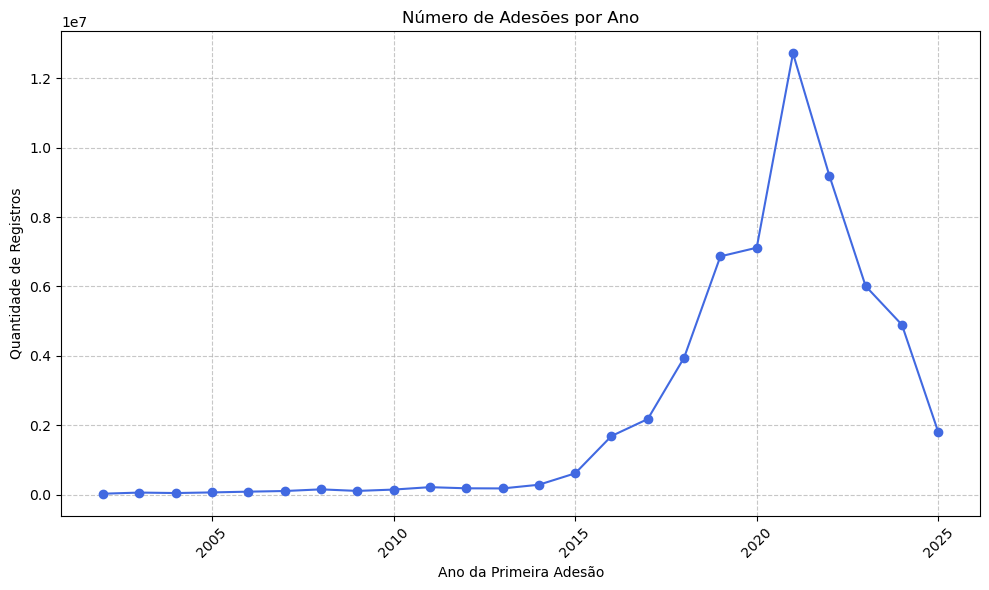

In [28]:
# Contar ocorrências por ano e ordenar
contagem_por_ano = df['ano.adesao'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(contagem_por_ano.index, contagem_por_ano.values, marker='o', linestyle='-', color='royalblue')

plt.title('Número de Adesões por Ano')
plt.xlabel('Ano da Primeira Adesão')
plt.ylabel('Quantidade de Registros')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

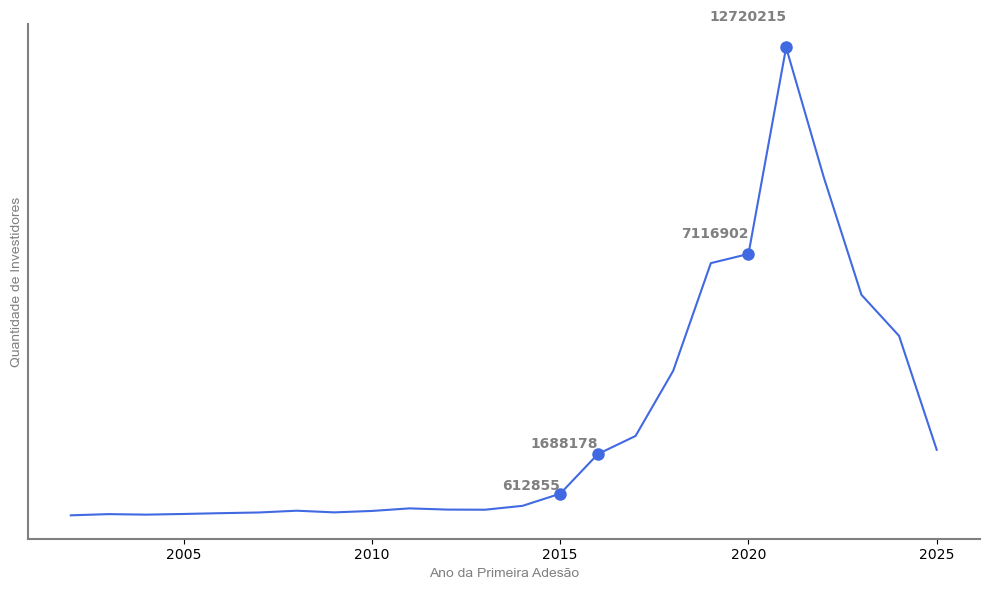

In [29]:
# Contar ocorrências por ano e ordenar
contagem_por_ano = df['ano.adesao'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Plotar a linha sem marcadores
plt.plot(contagem_por_ano.index, contagem_por_ano.values, linestyle='-', color='royalblue')

# Definir os anos que terão marcador
anos_legenda = [2015, 2016, 2020, 2021]

# Plotar os marcadores apenas nesses anos
for x, y in zip(contagem_por_ano.index, contagem_por_ano.values):
    if x in anos_legenda:
        plt.plot(x, y, marker='o', markersize=8, color='royalblue')

# Título e rótulos com fonte Arial
plt.xlabel("Ano da Primeira Adesão", fontname='Arial', color='gray')
plt.ylabel("Quantidade de Investidores", fontname='Arial', color='gray')

# Tirar grid
plt.grid(False)

# Customizar spines
ax = plt.gca()

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(1.5)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('gray')
ax.spines['left'].set_linewidth(1.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remover os ticks do eixo Y
ax.set_yticks([])

# Mostrar valores apenas nos anos destacados
for x, y in zip(contagem_por_ano.index, contagem_por_ano.values):
    if x in anos_legenda:
        plt.text(
            x, 
            y + (y*0.05), 
            f"{y}",           
            ha='right', va='bottom', fontsize=10, fontweight='bold', color='gray'
        )

plt.tight_layout()
plt.show()

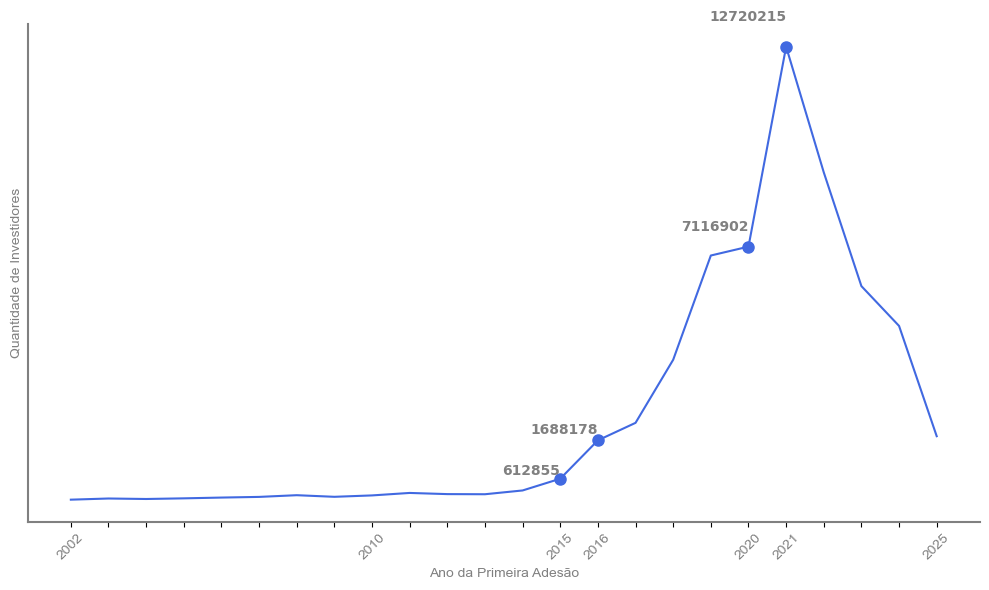

In [30]:
# Contar ocorrências por ano e ordenar
contagem_por_ano = df['ano.adesao'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Plotar a linha sem marcadores
plt.plot(contagem_por_ano.index, contagem_por_ano.values, linestyle='-', color='royalblue')

# Definir os anos que terão marcador
anos_legenda = [2015, 2016, 2020, 2021]

# Plotar os marcadores apenas nesses anos
for x, y in zip(contagem_por_ano.index, contagem_por_ano.values):
    if x in anos_legenda:
        plt.plot(x, y, marker='o', markersize=8, color='royalblue')

# --------- ROTULOS DO EIXO X SOMENTE PARA ANOS ESPECÍFICOS ---------
anos_rotulo = [2002, 2010, 2015, 2016, 2020, 2021, 2025]
xticks_labels = []

for year in contagem_por_ano.index:
    if year in anos_rotulo:
        xticks_labels.append(str(year))
    else:
        xticks_labels.append("")  # rótulo vazio

plt.xticks(contagem_por_ano.index, xticks_labels, rotation=45, fontname='Arial', color='gray')

# Rótulos do eixo
plt.xlabel("Ano da Primeira Adesão", fontname='Arial', color='gray')
plt.ylabel("Quantidade de Investidores", fontname='Arial', color='gray')

# Remover grid
plt.grid(False)

# Customizar spines
ax = plt.gca()
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(1.5)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('gray')
ax.spines['left'].set_linewidth(1.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remover ticks do eixo Y
ax.set_yticks([])

# Mostrar valores apenas nos anos destacados
for x, y in zip(contagem_por_ano.index, contagem_por_ano.values):
    if x in anos_legenda:
        plt.text(
            x, 
            y + (y*0.05), 
            f"{y}",
            ha='right', va='bottom', fontsize=10, fontweight='bold', color='gray'
        )

plt.tight_layout()
plt.show()

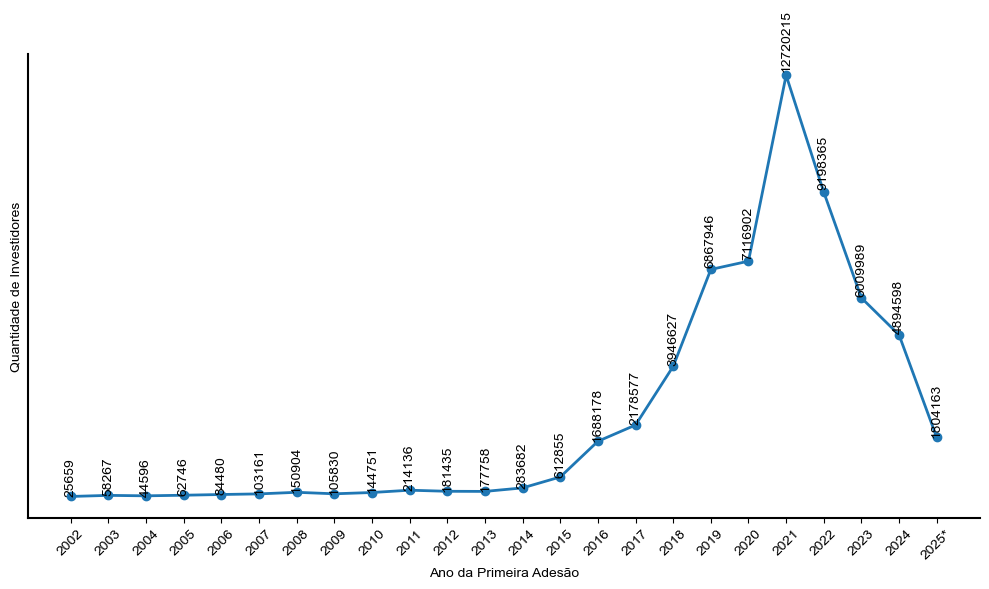

In [31]:
# Contar ocorrências por ano e ordenar
contagem_por_ano = df['ano.adesao'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Plotar linha
plt.plot(contagem_por_ano.index, contagem_por_ano.values, marker='o', linewidth=2)

# Adicionar os valores acima de cada ponto (na vertical)
for x, y in zip(contagem_por_ano.index, contagem_por_ano.values):
    plt.text(
        x,                         
        y + (y * 0.01),            
        str(y),                   
        ha='center', va='bottom', fontsize=10,
        rotation=90, color='black', fontname='Arial'
    )

# Título e rótulos com fonte Arial
plt.xlabel("Ano da Primeira Adesão", fontname='Arial')
plt.ylabel("Quantidade de Investidores", fontname='Arial')

# Tirar grid
plt.grid(False)

# Customizar spines
ax = plt.gca()

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remover os ticks do eixo Y
ax.set_yticks([])

# Ajustar os rótulos do eixo X, colocando '2025*' no último valor
xticks_labels = [str(year) for year in contagem_por_ano.index]
xticks_labels[-1] = '2025*'
plt.xticks(contagem_por_ano.index, xticks_labels, rotation=45, fontname='Arial')

plt.tight_layout()
plt.show()

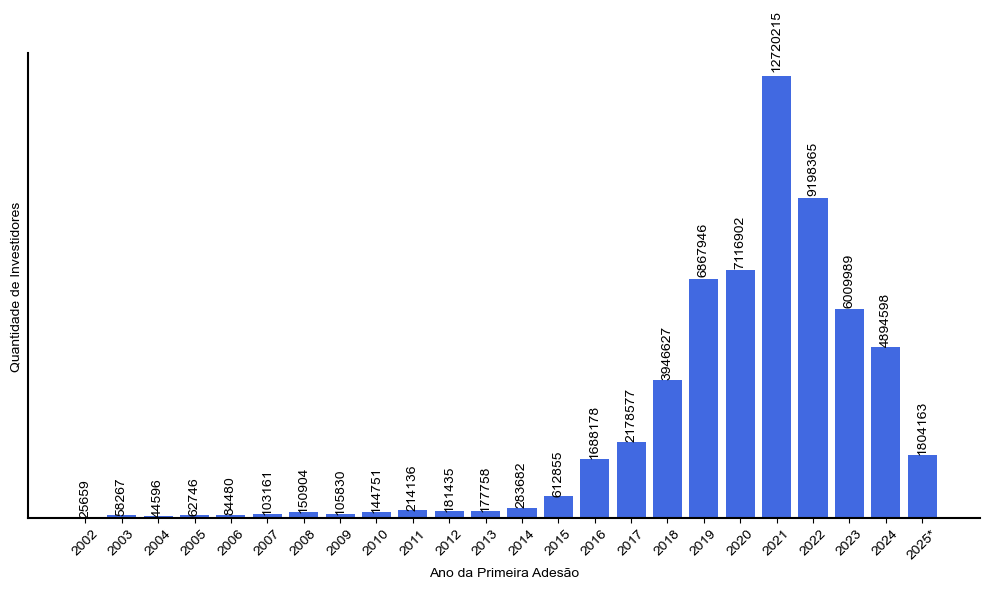

In [32]:
# Contar ocorrências por ano e ordenar
contagem_por_ano = df['ano.adesao'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(contagem_por_ano.index, contagem_por_ano.values, color='royalblue')

# Adicionar os valores acima de cada barra (na vertical)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,       
        bar.get_height() + (bar.get_height()*0.01),
        str(bar.get_height()),                 
        ha='center', va='bottom', fontsize=10,
        rotation=90, color='black', fontname='Arial'
    )

# Título e rótulos com fonte Arial
plt.xlabel("Ano da Primeira Adesão", fontname='Arial')
plt.ylabel("Quantidade de Investidores", fontname='Arial')

# Tirar grid
plt.grid(False)

# Customizar spines
ax = plt.gca()

# Eixos X e Y com linha preta sólida de 1,5 pt
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)

# Remover os outros spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remover ticks do eixo Y
ax.set_yticks([])

# Ajustar os rótulos do eixo X, colocando '2025*' no lugar do último
xticks_labels = [str(year) for year in contagem_por_ano.index]
xticks_labels[-1] = '2025*'  # Substitui o último ano
plt.xticks(contagem_por_ano.index, xticks_labels, rotation=45, fontname='Arial')

plt.tight_layout()
plt.show()

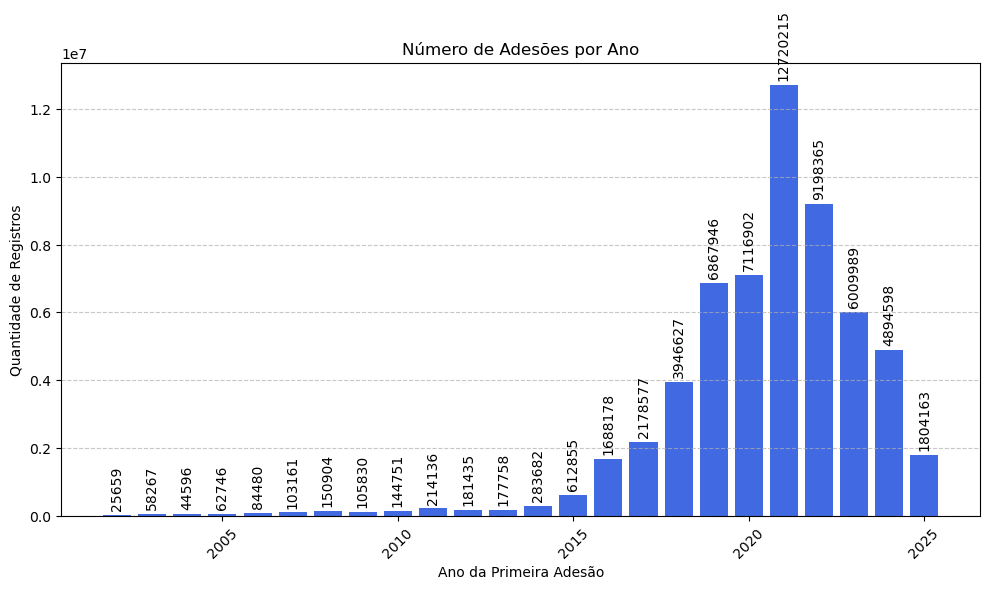

In [33]:
# Contagem por ano (ordenada)
contagem_por_ano = df['ano.adesao'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
barras = plt.bar(contagem_por_ano.index, contagem_por_ano.values, color='royalblue')

# Adicionar os valores em cima de cada barra (na vertical)
plt.bar_label(barras, labels=contagem_por_ano.values, padding=3, rotation=90)

# Títulos e eixos
plt.title('Número de Adesões por Ano')
plt.xlabel('Ano da Primeira Adesão')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

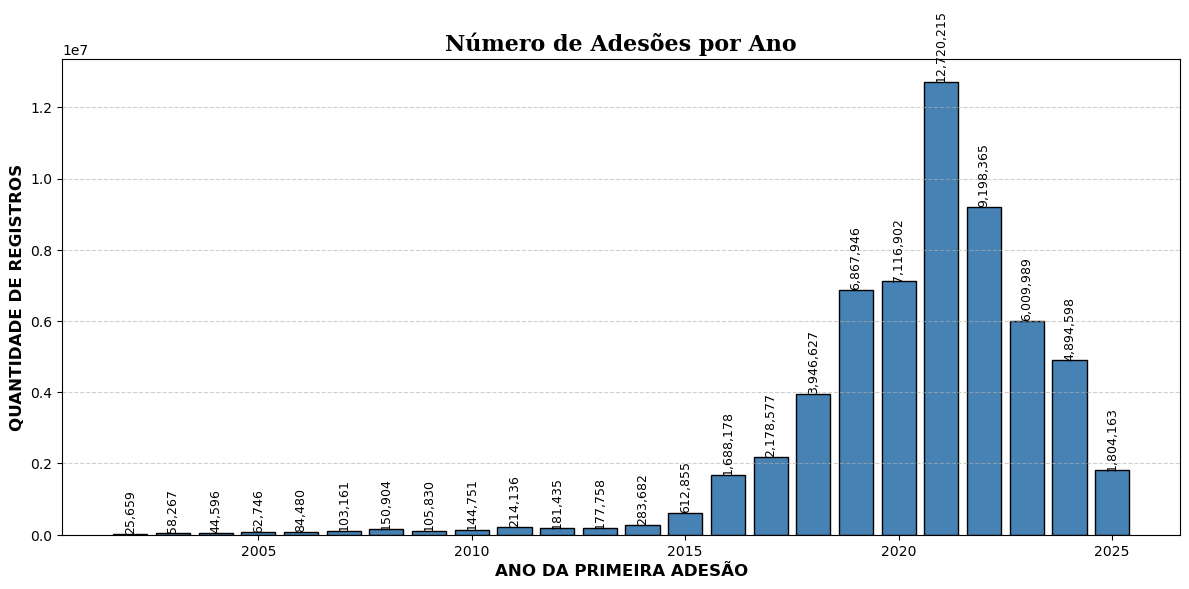

In [34]:
# Supondo que você já tenha o contagem_por_ano calculado
# contagem_por_ano = df['ano.adesao'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Barras com cor mais sóbria
bars = plt.bar(contagem_por_ano.index, contagem_por_ano.values, 
               color='steelblue', edgecolor='black')

# Adicionar valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=9, rotation=90)

# Títulos e eixos no padrão USP/ESALQ
plt.title("Número de Adesões por Ano", fontsize=16, fontweight='bold', family='serif')
plt.xlabel("ANO DA PRIMEIRA ADESÃO", fontsize=12, fontweight='bold')
plt.ylabel("QUANTIDADE DE REGISTROS", fontsize=12, fontweight='bold')

# Grade discreta
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout limpo
plt.tight_layout()
plt.show()

In [35]:
# Renomeando
mapeamento_estado_civil = {
    'Solteiro(a)': 'solteiro',
    'União estável': 'casado.uniao.estavel',
    'Casado(a) com brasileiro(a) nato(a)': 'casado.uniao.estavel',
    'Casado(a) com brasileiro(a) naturalizado(a)': 'casado.uniao.estavel',
    'Casado(a) com estrangeiro(a)': 'casado.uniao.estavel',
    'Separado judic.': 'separado.divorciado',
    'Desquitado(a)': 'separado.divorciado',
    'Divorciado(a)': 'separado.divorciado',
    'Viúvo(a)': 'outro',
    'Não se aplica': 'outro'
}

# Criar nova coluna agrupada
df['estado.civil.agrupado'] = df['estado.civil'].map(mapeamento_estado_civil)

In [36]:
# Quantidade por estado_civil_agrupado
contagem_estado_civil_agrupado = df['estado.civil.agrupado'].value_counts().sort_index().reset_index()
contagem_estado_civil_agrupado.columns = ['estado.civil.agrupado', 'quantidade']
print(contagem_estado_civil_agrupado)

  estado.civil.agrupado  quantidade
0  casado.uniao.estavel     2329852
1                 outro      620153
2   separado.divorciado    19565417
3              solteiro    36160398


## Tratamento Gênero

In [37]:
# Quantidade por genero
contagem_genero_antes = df['genero'].value_counts().sort_index().reset_index()
contagem_genero_antes.columns = ['genero', 'quantidade']
print(contagem_genero_antes)

  genero  quantidade
0      F    15156835
1      M    43518982
2      N           3


In [38]:
df = df[df['genero'] != 'N']

In [39]:
print((df['genero'] == 'N').sum())

0


In [40]:
# Quantidade por genero
contagem_genero_depois = df['genero'].value_counts().sort_index().reset_index()
contagem_genero_depois.columns = ['genero', 'quantidade']
print(contagem_genero_depois)

  genero  quantidade
0      F    15156835
1      M    43518982


## Tratamento Profissão
- Profissão possuia 159 valores únicos, agrupei-as em 10 grupos.

In [41]:
def categorizar_profissao(profissao):
    profissao = profissao.upper().strip()

    admin = [
        "ADMINISTRADOR", "GERENTE", "DIRETOR DE EMPRESAS", "COORDENADOR E SUPERVISOR", "CONSULTOR",
        "ECONOMISTA", "CONTADOR", "TÉCNICO DE CONTABILIDADE E DE ESTATÍSTICA",
        "SUPERIOR, INSPETOR E AGENTE DE COMPRAS E VENDAS", "AGENTE ADMINISTRATIVO", "CHEFE INTERMEDIÁRIO",
        "OCUPANTE DE CARGO DE DIREÇÃO E ASSESSORAMENTO INTERMEDIÁRIO", "OCUPANTE DE CARGO DE DIREÇÃO E ASSESSORAMENTO SUPERIOR",
        "PROPRIETÁRIO DE ESTABELECIMENTO COMERCIAL", "PROPRIETÁRIO DE ESTABELECIMENTO INDUSTRIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO DE PRESTAÇÃO DE SERVIÇOS", "PROPRIETÁRIO DE MICROEMPRESAS",
        "VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CAIXEIRO VIAJANTE",
        "VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA", "AGENTE DE VIAGEM E GUIA DE TURISMO",
        "DESPACHANTE, INCLUSIVE O ADUANEIRO", "DEMONSTRADOR", "LEILOEIRO, AVALIADOR E ASSEMELHADOS", "BANCARIO E ECONOMIÁRIO",
        "EMPRESÁRIO", "PROPRIETARIO DE MICROEMPRESAS", "CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES", "SECURITÁRIO",
        "TRABALHADOR DOS SERVIÇOS DE CONTABILIDADE, DE CAIXA", "ATUÁRIO E MATEMÁTICO"
    ]

    saude = [
        "MÉDICO", "ENFERMEIRO E NUTRICIONISTA", "FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL",
        "FARMACÊUTICO", "ODONTÓLOGO E DENTISTA", "FONOAUDIÓLOGO", "VETERINÁRIO E ZOOTECNISTA",
        "PROTÉTICO", "AUXILIAR DE LABORATÓRIO", "TÉCNICO DE LABORATÓRIO E RAIO X", "TÉCNICO DE BIOLOGIA",
        "PSICÓLOGO", "AUXILIAR DE LABORATORIO"
    ]

    educacao = [
        "PROFESSOR DE ENSINO SUPERIOR", "PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS",
        "DIRETOR DE ESTABELECIMENTO DE ENSINO", "OUTROS TRABALHADORES DE NÍVEL SUPERIOR LIGADOS AO ENSINO",
        "ESTUDANTE", "BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS", "ESTATÍSTICO", "FÍSICO", "QUIMICO",
        "BIÓLOGO E BIOMÉDICO", "ASTRÔNOMO E METEOROLOGISTA", "GEÓLOGO", "GEÓGRAFO", "SOCIÓLOGO",
        "BIBLIOTECÁRIO, ARQUIVISTA, MUSEÓLOGO E ARQUEÓLOGO"
    ]

    tecnologia = [
        "ANALISTA DE SISTEMAS", "TECNÓLOGO", "ENGENHEIRO",
        "TÉCNICO DE ELETRICIDADE, ELETRÔNICA E TELECOMUNICAÇÕES", "TÉCNICO DE MECÂNICA",
        "TÉCNICO DE QUÍMICA", "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "DESENHISTA INDUSTRIAL",
        "DESENHISTA TÉCNICO", "DESENHISTA COMERCIAL", "OPERADOR DE CÂMARA DE CINEMA E TELEVISÃO",
        "MAQUINISTA E FOGUISTA DE EMBARCAÇÕES, LOCOMOTIVAS"
    ]

    direito = [
        "ADVOGADO", "DELEGADO DE POLÍCIA", "SERVIDOR PÚBLICO MUNICIPAL", "SERVIDOR PÚBLICO ESTADUAL",
        "SERVIDOR PÚBLICO FEDERAL", "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO", "MILITAR EM GERAL",
        "MILITAR REFORMADO", "BOMBEIRO", "OFICIAIS DAS FORÇAS ARMADAS E FORÇAS AUXILIARES",
        "MEMBRO DO PODER JUDICIÁRIO: MINISTRO DE TRIB. SUPERIOR", "MEMBRO DO PODER EXECUTIVO: PRES.REPÚBLICA, MINISTRO ETC.",
        "MEMBRO DO PODER LEGISLATIVO: SENADOR, DEP.FED.E ESTADUAL", "TABELIÃO", "PROCURADOR E ASSEMELHADOS",
        "FISCAL", "SERVENTUÁRIO DE JUSTIÇA", "DIPLOMATA", "SERVIDO PÚBLICO ESTADUAL", "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO SUPERIOR",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO INTERMEDIÁRIO"
    ]

    comunicacao = [
        "PUBLICITÁRIO", "RELAÇÕES PÚBLICAS", "COMUNICÓLOGO", "JORNALISTA",
        "LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E RADIALISTA", "ESCULTOR, PINTOR E ASSEMELHADOS",
        "ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS", "CANTOR E COMPOSITOR", "MÚSICO", "MODELO DE MODAS",
        "COREÓGRAFO E BAILARINO", "EMPRESÁRIO ARTÍSTICO E PRODUTOR DE ESPETÁCULOS PÚBLICOS",
        "PROFISSIONAIS DE LETRAS E DE ARTES", "AGENCIADOR DE PROPAGANDA", "ARQUITETO", "DECORADOR", "JOALHEIROS E OURIVES"
    ]

    servicos = [
        "AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS", "SECRETARIO, ESTENÓGRAFO, DATILÓGRAFO, RECEPCIONISTA,TELEF.",
        "CABELEIREIRO, BARBEIRO, MANICURE, PEDICURE, MAQUILADOR", "GOVERNANTA DE HOTEL, CAMAREIRO, PORTEIRO, COZINHEIRO",
        "PORTEIRO DE EDIFÍCIO, ASCENSORISTA, GARAGISTA E FAXINEIRO", "EMPREGADO DOMÉSTICO",
        "AGENTE DE SERVIÇOS FUNERÁRIOS E EMBALSAMADOR", "FEIRANTE", "JORNALEIRO", "ESTIVADOR, CARREGADOR, EMBALADOR E ASSEMELHADOS",
        "ASSISTENTE SOCIAL", "ALFAIATE", "COMISSÁRIO DE BORDO"
    ]

    industria = [
        "MECÂNICO DE MANUTENÇÃO DE VEÍCULOS AUTOMÓVEIS E MÁQUINAS", "ELETRICISTA E ASSEMELHADOS",
        "ELETRICISTA DE MANUTENÇÃO DE VEÍCULOS AUTOMOTORES MÁQUINAS", "MECANICO DE MANUTENÇÃO, MONTADOR, PREPARADOR, OPERADOR",
        "LANTERNEIRO E PINTOR DE VEÍCULOS METÁLICOS", "TRABALHADOR METALÚRGICO E SIDERÚRGICO",
        "TRABALHADOR DE CONSTRUÇÃO CIVIL", "TRABALHADOR DE FABRICAÇÃO DE ALIMENTOS BEBIDAS",
        "TRABALHADOR DE FABRICAÇÃO DE ROUPAS", "TRABALHADOR DE FABRICAÇÃO DE ARTEFATOS DE MADEIRA",
        "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS DE BORRACHA E PLÁSTICO", "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS TÊXTEIS",
        "TRABALHADOR DE USINAGEM E METAIS", "TRABALHADOR DE ARTES GRÁFICAS", "TRABALHADOR DE FABRICAÇÃO DE PAPEL E PAPELÃO",
        "TRABALHADOR DE TRATAMENTO DE FUMO E DE FABR. CIGARROS", "TRABALHADOR DE INSTALAÇÕES DE PROCESSAMENTO QUÍMICO",
        "TRABALHADOR DE FABRICAÇÃO DE CALÇADOS E ARTEFATOS DE COURO", "PILOTO DE AERONAVES", "MOTORISTA DE VEÍCULOS DE TRANSPORTE DE PASSAGEIROS",
        "MOTORISTA DE VEICULOS DE TRANSPORTE DE CARGA", "MARINHEIRO E ASSEMELHADOS", "COMANDANTE DE EMBARCAÇOES", "CONTRAMESTRE DE EMBARCAÇÕES",
        "MESTRE E CONTRAMESTRE", "TRABALHADOR DE FABRICAÇÃO E PREPARAÇÃO DE ALIMENTOS BEBIDAS"
    ]

    agropecuaria = [
        "TRABALHADOR AGRÍCOLA", "TRABALHADOR DA PECUÁRIA", "TRABALHADOR FLORESTAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO AGRÍCOLA, DA PECUÁRIA", "AGRONOMO", "GARIMPEIRO", "TRABALHADOR DA PESCA"
    ]

    outros = [
        "OUTROS", "CAPITALISTA, RECEBENDO RENDIMENTO DE APLICAÇÃO DE CAPITAL", "PENSIONISTA",
        "PROPRIETÁRIO DE IMÓVEL (RECEBENDO RENDIMENTO DE ALUGUEL)", "SACERDOTE OU MEMBRO DE ORDENS OU SEITAS RELIGIOSAS",
        "PROFISSIONAL LIBERAL", "NÃO SE APLICA", "FALECIDO", "APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)",
        "TRABALHADOR AUTÔNOMO", "ATLETA PROFISSIONAL E TÉCNICO EM DESPORTOS"
    ]

    # Mapeamento
    categorias = {
        "Administracao_Negocios_e_Contabilidade": admin,
        "Saude": saude,
        "Educacao_Pesquisa_e_Ciencias": educacao,
        "Tecnologia_Engenharia_e_Producao": tecnologia,
        "Direito_Seguranca_e_servicos_publicos": direito,
        "Servicos_Gerais_e_Atendimento": servicos,
        "Industria_Construcao_e_Transporte": industria,
        "Agropecuaria_e_Meio_Ambiente": agropecuaria,
        "Outros": outros,
        "Comunicacao_artes_e_midia": comunicacao,
    }

    for categoria, lista in categorias.items():
        if profissao in lista:
            return categoria
    return "Categoria_nao_identificada"

# Exemplo de uso:
df["profissao.categoria"] = df["profissao"].apply(categorizar_profissao)

In [42]:
# Quantidade por genero
contagem_profissao_categoria = df['profissao.categoria'].value_counts().sort_index().reset_index()
contagem_profissao_categoria = ['profissao.categoria', 'quantidade']
print(contagem_profissao_categoria)

['profissao.categoria', 'quantidade']


## Tratamento Faixa Etária
As idades foram agrupadas em 4 faixas:
- 0 a 24 anos;
- 25 a 34 anos;
- 35 a 44 anos;
- 44 anos mais.

In [43]:
# Dividir em faixa etária

# Define os intervalos e os rótulos personalizados
bins = [0, 25, 35, 45, float('inf')]
labels = ['ate_24_anos', '25_a_34_anos', '35_a_44_anos', '44_anos_mais']

# Aplica a categorização
df['faixa.etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)

In [44]:
# Quantidade por genero
contagem_faixa_etaria = df['faixa.etaria'].value_counts().sort_index().reset_index()
contagem_faixa_etaria.columns = ['faixa.etaria', 'quantidade']
print(contagem_faixa_etaria)

   faixa.etaria  quantidade
0   ate_24_anos     8459647
1  25_a_34_anos    19801039
2  35_a_44_anos    16645441
3  44_anos_mais    13769690


## Tratamento Região
As cidades foram agrupadas em 5 regiões:
- Centro-Oeste;
- Nordeste;
- Norte;
- Sudeste;
- Sul.

In [45]:
print(df['uf'].unique())
print(df['uf'].value_counts())

['SP' 'PR' 'SC' 'MT' 'MG' 'DF' 'RS' 'AM' 'GO' 'PB' 'RJ' 'BA' 'ES' 'PE'
 'MS' 'CE' 'MA' 'PA' 'AL' 'RN' 'AP' 'SE' 'RO' 'PI' 'RR' 'AC' 'TO' '  ']
uf
SP    18407707
RJ     5846742
MG     5780545
PR     3398960
RS     2822659
BA     2681868
SC     2532464
GO     1996819
PE     1810740
DF     1758945
CE     1739567
PA     1319434
ES     1175438
MT      917821
MA      889316
AM      800660
PB      732379
MS      701163
RN      699496
AL      539305
PI      482800
SE      451320
RO      402454
TO      367633
AP      153690
AC      135131
RR      130759
             2
Name: count, dtype: int64


In [46]:
# Vendo quais linhas tem uf = ' '
df[df['uf'] == '  ']

,codigo,data.adesao,estado.civil,genero,profissao,idade,uf,cidade,pais,situacao,operou.12.meses,data.adesao.tratada,primeira.adesao,ano.adesao,faixa.ano,situacao.final,operou.12.meses.final,estado.civil.agrupado,profissao.categoria,faixa.etaria
44667189,19215,03/02/2006,Casado(a) com brasileiro(a) nato(a),M,OUTROS,75,,NaN,BRASIL,D,N,2006-02-03,2006-02-03,2006,2002_2015,D,N,casado.uniao.estavel,Outros,44_anos_mais
48589303,38613644,18/10/2022,Solteiro(a),M,ESTUDANTE,21,,SETE LAGOAS,BRASIL,A,N,2022-10-18,2022-10-18,2022,2021_2025,A,N,solteiro,Educacao_Pesquisa_e_Ciencias,ate_24_anos


In [47]:
# Excluindo essas linhas
df = df[df['uf'] != '  ']

In [48]:
#  Verificando se foi feito corretamente
df[df['uf'] == '  ']

,codigo,data.adesao,estado.civil,genero,profissao,idade,uf,cidade,pais,situacao,operou.12.meses,data.adesao.tratada,primeira.adesao,ano.adesao,faixa.ano,situacao.final,operou.12.meses.final,estado.civil.agrupado,profissao.categoria,faixa.etaria


In [49]:
# Dicionário que mapeia cada UF para sua respectiva região (em letras minúsculas)
uf_para_regiao = {
    # Norte
    'AC': 'norte', 'AP': 'norte', 'AM': 'norte', 'PA': 'norte',
    'RO': 'norte', 'RR': 'norte', 'TO': 'norte',
    
    # Nordeste
    'AL': 'nordeste', 'BA': 'nordeste', 'CE': 'nordeste', 'MA': 'nordeste',
    'PB': 'nordeste', 'PE': 'nordeste', 'PI': 'nordeste', 'RN': 'nordeste',
    'SE': 'nordeste',
    
    # Centro-Oeste
    'DF': 'centro_oeste', 'GO': 'centro_oeste', 'MT': 'centro_oeste', 'MS': 'centro_oeste',
    
    # Sudeste
    'ES': 'sudeste', 'MG': 'sudeste', 'RJ': 'sudeste', 'SP': 'sudeste',
    
    # Sul
    'PR': 'sul', 'RS': 'sul', 'SC': 'sul'
}

# Criar a coluna 'regiao' com base na coluna 'uf'
df['regiao'] = df['uf'].map(uf_para_regiao)

## Exclusão investidores duplicados

In [50]:
# 1. Ordena pelo código e pela menor data de adesão
df = df.sort_values(['codigo', 'primeira.adesao'], ascending=[True, True])

# 2. Remove duplicatas mantendo a primeira ocorrência (menor data)
df = df.drop_duplicates(subset='codigo', keep='first')

# Agora df está substituído e contém só linhas únicas por código

In [51]:
print(len(df))

31883794


In [52]:
# Vendo os nomes das colunas
print(df.columns)

Index(['codigo', 'data.adesao', 'estado.civil', 'genero', 'profissao', 'idade',
       'uf', 'cidade', 'pais', 'situacao', 'operou.12.meses',
       'data.adesao.tratada', 'primeira.adesao', 'ano.adesao', 'faixa.ano',
       'situacao.final', 'operou.12.meses.final', 'estado.civil.agrupado',
       'profissao.categoria', 'faixa.etaria', 'regiao'],
      dtype='object')


In [ ]:
df_atualizado = df.drop(columns=['codigo', 'data.adesao', 'estado.civil', 'profissao', 'idade', 'uf', 'cidade',
                            'pais', 'situacao', 'operou.12.meses', 'data.adesao.tratada', 'ano.adesao', 
                            'primeira.adesao'])

In [ ]:
df_atualizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31883794 entries, 27298733 to 18996990
Data columns (total 8 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   genero                 object  
 1   faixa.ano              object  
 2   situacao.final         object  
 3   operou.12.meses.final  object  
 4   estado.civil.agrupado  object  
 5   profissao.categoria    object  
 6   faixa.etaria           category
 7   regiao                 object  
dtypes: category(1), object(7)
memory usage: 1.9+ GB


In [ ]:
df_atualizado.to_csv('df_atualizado.csv', index=False)

In [ ]:
df_atualizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31883794 entries, 27298733 to 18996990
Data columns (total 8 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   genero                 object  
 1   faixa.ano              object  
 2   situacao.final         object  
 3   operou.12.meses.final  object  
 4   estado.civil.agrupado  object  
 5   profissao.categoria    object  
 6   faixa.etaria           category
 7   regiao                 object  
dtypes: category(1), object(7)
memory usage: 1.9+ GB


In [ ]:
print(len(df_atualizado))

31883794
